In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [24]:
import os
os.chdir(r"C:\Users\LOQ\Desktop\Skillx\Flower_Recog_Model")
print("New CWD:", os.getcwd())


New CWD: C:\Users\LOQ\Desktop\Skillx\Flower_Recog_Model


In [ ]:
import os
print("Sample folder contents:", os.listdir('Sample'))


In [3]:
#Fetch Images count from Fodlers

In [4]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 780 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4313 Images


In [5]:
#Load Images into Arrays as Dataset

In [6]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4313 files belonging to 5 classes.
Using 3451 files for training.
Found 4313 files belonging to 5 classes.
Using 862 files for validation.


In [8]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [9]:
import matplotlib.pyplot as plt

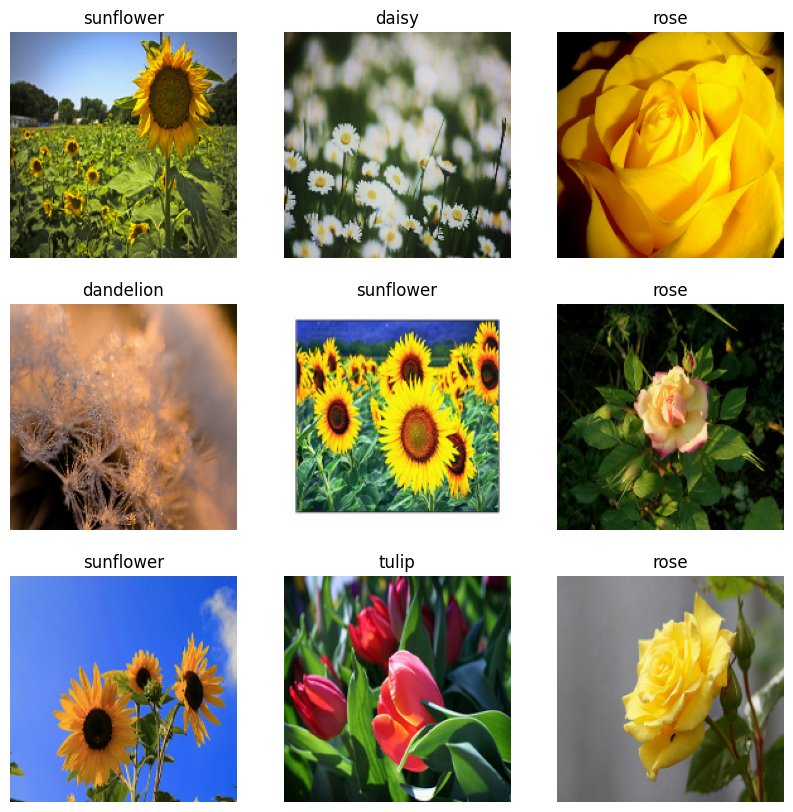

In [10]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [13]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
#Data Augmentation

In [15]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\LOQ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


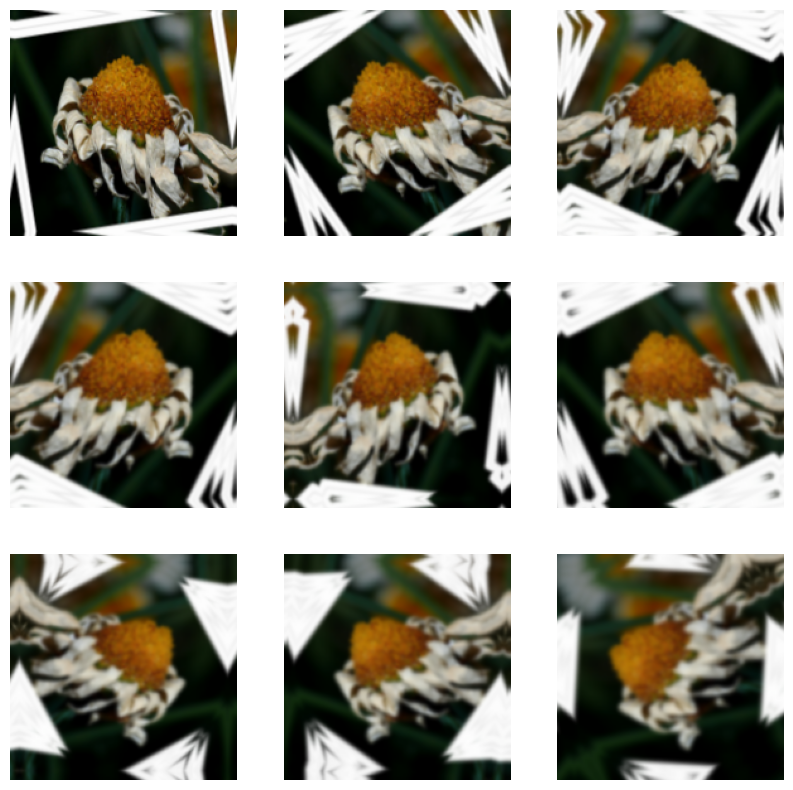

In [16]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [17]:
#MOdel Creation

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.4428 - loss: 1.3061 - val_accuracy: 0.5487 - val_loss: 1.1661
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.5874 - loss: 1.0448 - val_accuracy: 0.5592 - val_loss: 1.1127
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.6233 - loss: 0.9667 - val_accuracy: 0.6276 - val_loss: 0.9504
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.6592 - loss: 0.8764 - val_accuracy: 0.6555 - val_loss: 0.8806
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.6688 - loss: 0.8519 - val_accuracy: 0.6624 - val_loss: 0.8585
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.6949 - loss: 0.7961 - val_accuracy: 0.6705 - val_loss: 0.8327
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7166 - loss: 0.7513 - val_accuracy: 0.6717 - val_loss: 0.8608
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7096 - loss: 0.734

In [22]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [23]:
classify_images('Sample/rose.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'Sample/rose.jpg'

In [ ]:
model.save("Flower_Recog_Model.keras")

NameError: name 'model' is not defined